# GRABEN

In [10]:
import sys
sys.path.append("../../gempy")
sys.path.append("../../pynoddy")
import copy
import importlib

import numpy as np
import pandas as pn
import math

import gempy as gp
from gempy import Topology as tp
#np.set_printoptions(threshold=10000000)
# import pynoddy
# import pynoddy.history
# import pynoddy.output
# import pynoddy.events
# import pynoddy.experiment

import matplotlib.pyplot as plt
%matplotlib inline

import pymc
import theano

# Data Import

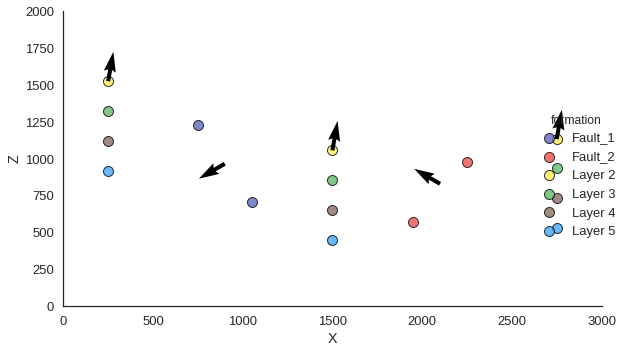

In [11]:
# geo_data = gp.read_pickle("exp1_data.pickle")

# initialize geo_data object
geo_data = gp.create_data([0, 3000, 0, 75, 0, 2000],
                          resolution=[120, 3, 80])

geo_data.import_data_csv("data/exp1_graben_interf.csv", "data/exp1_graben_fol.csv")
geo_data.calculate_gradient()

form = np.delete(geo_data.get_formations(), np.where(geo_data.get_formations()=="Fault_1")[0][0])
gp.set_series(geo_data, {"Fault_1":geo_data.get_formations()[np.where(geo_data.get_formations()=="Fault_1")[0][0]],
                         "Fault_2":geo_data.get_formations()[np.where(geo_data.get_formations()=="Fault_2")[0][0]],
                         "Rest":np.delete(form, np.where(form=="Fault_2"))},
                           order_series = ["Fault_1", "Fault_2", "Rest"], verbose=0, order_formations=['Fault_1', "Fault_2",'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])

geo_data.set_formation_number()
geo_data.order_table()

%matplotlib inline
gp.plot_data(geo_data)
plt.xlim(0,3000)
plt.ylim(0,2000)
plt.tight_layout()
#plt.savefig("input_data.pdf")

In [12]:
#geo_data = gp.select_series(geo_data, ["Fault_2", "Rest"])

In [13]:
# interp_data = gp.InterpolatorInput(geo_data, u_grade=[0,0,3], dtype="float64")  #, verbose=['n_formation'], dtype="float32")
# lith_block, fault_block = gp.compute_model(interp_data)

In [14]:
# fault_block

In [15]:
#interp_data.geo_data_res.n_faults

In [16]:
#theano.scan?

In [17]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[0,0,3], dtype="float64", verbose=['matrices_shapes', 'faults_contribution', 'covariance_matrix'])
lith_block, fault_block = gp.compute_model(interp_data)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
length_of_C __str__ = 4
length_of_CG __str__ = 3
length_of_CGI __str__ = 1
length_of_U_I __str__ = 0
length_of_faults __str__ = 0
cov_function __str__ = [[ 0.34333333  0.          0.         -0.03379516]
 [ 0.          0.34333333  0.          0.        ]
 [ 0.          0.          0.34333333  0.05846559]
 [-0.03379516  0.          0.05846559  0.01522609]]
Faults contribution __str__ = [ 0.  0.  0. ...,  0.  0.  0.]
fault matrix within __str__ = [[   1.            1.            1.         ...,    1.            1.            1.        ]
 [ 950.18282768  950.18448368  950.18605304 ...,  950.12458105
   950.15243608  950.15243608]]


ValueError: could not broadcast input array from shape (2,28820) into shape (0,28820)
Apply node that caused the error: for{cpu,scan_fn}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Elemwise{minimum,no_inplace}.0, Range, Covariance at 0, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Coordinates of the grid points to interpolate, <TensorType(float64, matrix)>, Value of the formation, <TensorType(int64, vector)>, <TensorType(float64, vector)>, Position of the dips, Rest of the points of the layers, Reference points for every layer, Angle of every dip, Azimuth, Polarity)
Toposort index: 111
Inputs types: [TensorType(int64, scalar), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(int64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(int64, vector), TensorType(int64, vector), TensorType(float64, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector)]
Inputs shapes: [(), (2,), (2,), (2,), (2,), (2,), (2,), (2,), (3, 2, 28820), (3, 0, 28820), (), (), (), (), (), (), (28800, 3), (9, 28800), (6,), (6,), (6,), (5, 3), (10, 3), (10, 3), (5,), (5,), (5,)]
Inputs strides: [(), (8,), (8,), (8,), (8,), (8,), (8,), (8,), (461120, 230560, 8), (230560, 230560, 8), (), (), (), (), (), (), (8, 230400), (230400, 8), (8,), (8,), (8,), (8, 40), (8, 80), (8, 80), (8,), (8,), (8,)]
Inputs values: [array(2), array([0, 1]), array([1, 2]), array([0, 1]), array([1, 2]), array([0, 1]), array([1, 2]), array([0, 0]), 'not shown', array([], shape=(3, 0, 28820), dtype=float64), array(2), array(0.7212662476506163), array(0.012386309523809529), array(0.01), array(2.0), array(4.0), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([ 60.,  60.,  10.,  10.,  10.]), array([  90.,  270.,   90.,   90.,   90.]), array([-1.,  1.,  1.,  1.,  1.])]
Inputs type_num: [7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 7, 7, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,scan_fn}.0, Constant{1})], [], [Join(TensorConstant{0}, for{cpu,scan_fn}.2, for{cpu,Looping interfaces}.1)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-e9c772e99cfd>", line 1, in <module>
    interp_data = gp.InterpolatorInput(geo_data, u_grade=[0,0,3], dtype="float64", verbose=['matrices_shapes', 'faults_contribution', 'covariance_matrix'])
  File "../../gempy/gempy/DataManagement.py", line 985, in __init__
    self.th_fn = self.compile_th_fn(output, compute_all=compute_all)
  File "../../gempy/gempy/DataManagement.py", line 1010, in compile_th_fn
    compute_all=compute_all),
  File "../../gempy/gempy/theanograf.py", line 1330, in compute_geological_model
    return_list=True,

Debugprint of the apply node: 
for{cpu,scan_fn}.0 [id A] <TensorType(float64, 3D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Subtensor{int64} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Shape [id I] <TensorType(int64, vector)> ''   
 | | | | | | | | |Subtensor{int64:int64:} [id J] <TensorType(int64, vector)> ''   
 | | | | | | | |   |Subtensor{:int64:} [id K] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Length of interfaces in every series [id L] <TensorType(int64, vector)>
 | | | | | | | |   | |Constant{3} [id M] <int64>
 | | | | | | | |   |Constant{0} [id N] <int64>
 | | | | | | | |   |Constant{-1} [id O] <int64>
 | | | | | | | |Constant{0} [id N] <int64>
 | | | | | | |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id Q] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id R] <TensorType(int64, vector)> ''   
 | | | | | |   |   |Subtensor{:int64:} [id K] <TensorType(int64, vector)> ''   
 | | | | | |   |   |Constant{1} [id S] <int64>
 | | | | | |   |Constant{0} [id N] <int64>
 | | | | | |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id U] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64:int64:} [id V] <TensorType(int64, vector)> ''   
 | | | | |   |   |Subtensor{:int64:} [id W] <TensorType(int64, vector)> ''   
 | | | | |   |   | |Length of foliations in every series [id X] <TensorType(int64, vector)>
 | | | | |   |   | |Constant{3} [id M] <int64>
 | | | | |   |   |Constant{0} [id N] <int64>
 | | | | |   |   |Constant{-1} [id O] <int64>
 | | | | |   |Constant{0} [id N] <int64>
 | | | | |Subtensor{int64} [id Y] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id Z] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id BA] <TensorType(int64, vector)> ''   
 | | | |   |   |Subtensor{:int64:} [id W] <TensorType(int64, vector)> ''   
 | | | |   |   |Constant{1} [id S] <int64>
 | | | |   |Constant{0} [id N] <int64>
 | | | |Subtensor{int64} [id BB] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id BC] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64:int64:} [id BD] <TensorType(int64, vector)> ''   
 | | |   |   |Subtensor{:int64:} [id BE] <TensorType(int64, vector)> ''   
 | | |   |   | |List with the number of formations [id BF] <TensorType(int64, vector)>
 | | |   |   | |Constant{3} [id M] <int64>
 | | |   |   |Constant{0} [id N] <int64>
 | | |   |   |Constant{-1} [id O] <int64>
 | | |   |Constant{0} [id N] <int64>
 | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id BI] <TensorType(int64, vector)> ''   
 | |   |   |Subtensor{:int64:} [id BE] <TensorType(int64, vector)> ''   
 | |   |   |Constant{1} [id S] <int64>
 | |   |Constant{0} [id N] <int64>
 | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 |   |Shape [id BK] <TensorType(int64, vector)> ''   
 |   | |Subtensor{int64::} [id BL] <TensorType(int64, vector)> ''   
 |   |   |Subtensor{:int64:} [id BM] <TensorType(int64, vector)> ''   
 |   |   | |Grade of the universal drift [id BN] <TensorType(int64, vector)>
 |   |   | |Constant{3} [id M] <int64>
 |   |   |Constant{0} [id N] <int64>
 |   |Constant{0} [id N] <int64>
 |Subtensor{:int64:} [id BO] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id J] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BQ] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id R] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |Subtensor{:int64:} [id BR] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id V] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |Subtensor{:int64:} [id BS] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BA] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |Subtensor{:int64:} [id BT] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id BD] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |Subtensor{:int64:} [id BU] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |Subtensor{:int64:} [id BV] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BL] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BP] <int64> ''   
 |IncSubtensor{Set;:int64:} [id BW] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id BX] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id BY] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id BZ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CA] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id CB] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id CC] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id CD] <TensorType(float64, matrix)> 'final block of faults init'   
 | | |   |Constant{0} [id N] <int64>
 | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | | |Shape [id CA] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id S] <int64>
 | | |Subtensor{int64} [id CF] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CA] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id CG] <int64>
 | |Rebroadcast{0} [id CB] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id CH] <int64> ''   
 |   |Subtensor{int64} [id BZ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id CI] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id CJ] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id CK] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id CL] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CM] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id CN] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id CO] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id CP] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id CQ] <TensorType(float64, scalar)>
 | | |   |       |TensorConstant{0} [id CR] <TensorType(int8, scalar)>
 | | |   |       |Elemwise{add,no_inplace} [id CS] <TensorType(int64, scalar)> ''   
 | | |   |         |Subtensor{int64} [id CT] <TensorType(int64, scalar)> ''   
 | | |   |         | |Shape [id CU] <TensorType(int64, vector)> ''   
 | | |   |         | | |Coordinates of the grid points to interpolate [id CV] <TensorType(float64, matrix)>
 | | |   |         | |Constant{0} [id N] <int64>
 | | |   |         |Elemwise{mul,no_inplace} [id CW] <TensorType(int64, scalar)> ''   
 | | |   |           |TensorConstant{2} [id CX] <TensorType(int8, scalar)>
 | | |   |           |Subtensor{int64} [id CY] <TensorType(int64, scalar)> ''   
 | | |   |             |Shape [id CZ] <TensorType(int64, vector)> ''   
 | | |   |             | |Rest of the points of the layers [id DA] <TensorType(float64, matrix)>
 | | |   |             |Constant{0} [id N] <int64>
 | | |   |Constant{0} [id N] <int64>
 | | |Subtensor{int64} [id DB] <TensorType(int64, scalar)> ''   
 | | | |Shape [id CM] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id S] <int64>
 | | |Subtensor{int64} [id DC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CM] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id CG] <int64>
 | |Rebroadcast{0} [id CN] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id DD] <int64> ''   
 |   |Subtensor{int64} [id CL] <TensorType(int64, scalar)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Range [id DE] <TensorType(float64, scalar)>
 |Covariance at 0 [id DF] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id DG] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id DH] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id DI] <TensorType(float64, scalar)>
 |Coordinates of the grid points to interpolate [id CV] <TensorType(float64, matrix)>
 |<TensorType(float64, matrix)> [id DJ] <TensorType(float64, matrix)>
 |Value of the formation [id DK] <TensorType(int64, vector)>
 |<TensorType(int64, vector)> [id DL] <TensorType(int64, vector)>
 |<TensorType(float64, vector)> [id DM] <TensorType(float64, vector)>
 |Position of the dips [id DN] <TensorType(float64, matrix)>
 |Rest of the points of the layers [id DA] <TensorType(float64, matrix)>
 |Reference points for every layer [id DO] <TensorType(float64, matrix)>
 |Angle of every dip [id DP] <TensorType(float64, vector)>
 |Azimuth [id DQ] <TensorType(float64, vector)>
 |Polarity [id DR] <TensorType(float64, vector)>
for{cpu,scan_fn}.1 [id A] <TensorType(float64, 3D)> ''   
for{cpu,scan_fn}.2 [id A] <TensorType(float64, matrix)> ''   

Inner graphs of the scan ops:

for{cpu,scan_fn}.0 [id A] <TensorType(float64, 3D)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id DS] <TensorType(float64, matrix)> ''   
 > |IncSubtensor{Set;int64, ::} [id DT] <TensorType(float64, matrix)> ''   
 > | |final block of faults init[t-1] [id DU] <TensorType(float64, matrix)> -> [id BW]
 > | |Sum{axis=[0], acc_dtype=int64} [id DV] <TensorType(int64, vector)> 'The chunk of block model of a specific series'   
 > | |Constant{0} [id DW] <int64>
 > |Elemwise{add,no_inplace} [id DX] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > |TensorConstant{1} [id DY] <TensorType(int64, scalar)>
 > |Subtensor{int64} [id DZ] <TensorType(int64, vector)> ''   
 >   |Nonzero [id EA] <TensorType(int64, matrix)> ''   
 >   | |Elemwise{Cast{int8}} [id EB] <TensorType(int8, vector)> ''   
 >   |   |Join [id EC] <TensorType(float64, vector)> ''   
 >   |     |TensorConstant{0} [id ED] <TensorType(int8, scalar)>
 >   |     |Elemwise{eq,no_inplace} [id EE] <TensorType(bool, vector)> 'Yet simulated FAULTS node'   
 >   |     |Alloc [id EF] <TensorType(float64, vector)> ''   
 >   |       |TensorConstant{1.0} [id EG] <TensorType(float64, scalar)>
 >   |       |Elemwise{mul,no_inplace} [id EH] <TensorType(int64, scalar)> ''   
 >   |         |TensorConstant{2} [id EI] <TensorType(int8, scalar)>
 >   |         |Subtensor{int64} [id EJ] <TensorType(int64, scalar)> ''   
 >   |           |Shape [id EK] <TensorType(int64, vector)> ''   
 >   |           | |Rest of the points of the layers_copy [id EL] <TensorType(float64, matrix)> -> [id DA]
 >   |           |Constant{0} [id DW] <int64>
 >   |Constant{0} [id DW] <int64>
 >Print{message='fault matrix within', attrs=('__str__',), global_fn=<function _print_fn at 0x7f7f5a06cd90>} [id EM] <TensorType(float64, matrix)> ''   
 > |Join [id EN] <TensorType(float64, matrix)> ''   
 >   |TensorConstant{0} [id ED] <TensorType(int8, scalar)>
 >   |<TensorType(float64, matrix)> [id EO] <TensorType(float64, matrix)> -> [id CI]
 >   |AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id DS] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor1{no_inplace,set} [id EP] <TensorType(float64, vector)> ''   
 > |<TensorType(float64, vector)> [id EQ] <TensorType(float64, vector)> -> [id DM]
 > |Elemwise{add,no_inplace} [id ER] <TensorType(float64, vector)> ''   
 > | |Subtensor{::int64} [id ES] <TensorType(float64, vector)> ''   
 > | | |SortOp{quicksort, None} [id ET] <TensorType(float64, vector)> ''   
 > | | | |AdvancedSubtensor1 [id EU] <TensorType(float64, vector)> ''   
 > | | | | |for{cpu,scan_fn} [id EV] <TensorType(float64, vector)> 'Value of the potential field at the interfaces'   
 > | | | | |Elemwise{sub,no_inplace} [id EW] <TensorType(int64, vector)> ''   
 > | | | |   |Subtensor{int64:int64:} [id EX] <TensorType(int64, vector)> ''   
 > | | | |   | |Value of the formation_copy [id EY] <TensorType(int64, vector)> -> [id DK]
 > | | | |   | |ScalarFromTensor [id EZ] <int64> ''   
 > | | | |   | | |<TensorType(int64, scalar)> [id FA] <TensorType(int64, scalar)> -> [id BT]
 > | | | |   | |ScalarFromTensor [id FB] <int64> ''   
 > | | | |   |   |<TensorType(int64, scalar)> [id FC] <TensorType(int64, scalar)> -> [id BU]
 > | | | |   |TensorConstant{(1,) of 1} [id FD] <TensorType(int8, (True,))>
 > | | | |TensorConstant{-1} [id FE] <TensorType(int8, scalar)>
 > | | |Constant{-1} [id FF] <int64>
 > | |Reshape{1} [id FG] <TensorType(float32, vector)> ''   
 > |   |Alloc [id FH] <TensorType(float32, row)> ''   
 > |   | |InplaceDimShuffle{0,x} [id FI] <TensorType(float32, (True, True))> ''   
 > |   | | |Rebroadcast{1} [id FJ] <TensorType(float32, (True,))> ''   
 > |   | |   |Reshape{1} [id FK] <TensorType(float32, vector)> ''   
 > |   | |     |Elemwise{Cast{float32}} [id FL] <TensorType(float32, scalar)> ''   
 > |   | |     | |Elemwise{sub,no_inplace} [id FM] <TensorType(int64, scalar)> ''   
 > |   | |     |   |TensorConstant{1000} [id FN] <TensorType(int16, scalar)>
 > |   | |     |   |Elemwise{mul,no_inplace} [id FO] <TensorType(int64, scalar)> ''   
 > |   | |     |     |TensorConstant{50} [id FP] <TensorType(int8, scalar)>
 > |   | |     |     |Subtensor{int64} [id FQ] <TensorType(int64, scalar)> ''   
 > |   | |     |       |Subtensor{int64:int64:} [id EX] <TensorType(int64, vector)> ''   
 > |   | |     |       |Constant{0} [id DW] <int64>
 > |   | |     |TensorConstant{(1,) of -1} [id FR] <TensorType(int64, (True,))>
 > |   | |Subtensor{int64} [id FS] <TensorType(int64, scalar)> ''   
 > |   | | |Shape [id FT] <TensorType(int64, vector)> ''   
 > |   | | | |Rebroadcast{1} [id FJ] <TensorType(float32, (True,))> ''   
 > |   | | |Constant{0} [id DW] <int64>
 > |   | |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 > |   |   |Shape [id FV] <TensorType(int64, vector)> ''   
 > |   |   | |Subtensor{::int64} [id ES] <TensorType(float64, vector)> ''   
 > |   |   |Constant{0} [id DW] <int64>
 > |   |MakeVector{dtype='int64'} [id FW] <TensorType(int64, vector)> ''   
 > |     |Elemwise{mul,no_inplace} [id FX] <TensorType(int64, scalar)> ''   
 > |       |Subtensor{int64} [id FS] <TensorType(int64, scalar)> ''   
 > |       |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 > |Elemwise{sub,no_inplace} [id EW] <TensorType(int64, vector)> ''   

for{cpu,scan_fn}.1 [id A] <TensorType(float64, 3D)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id DS] <TensorType(float64, matrix)> ''   
 >Print{message='fault matrix within', attrs=('__str__',), global_fn=<function _print_fn at 0x7f7f5a06cd90>} [id EM] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor1{no_inplace,set} [id EP] <TensorType(float64, vector)> ''   

for{cpu,scan_fn}.2 [id A] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id DS] <TensorType(float64, matrix)> ''   
 >Print{message='fault matrix within', attrs=('__str__',), global_fn=<function _print_fn at 0x7f7f5a06cd90>} [id EM] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor1{no_inplace,set} [id EP] <TensorType(float64, vector)> ''   

for{cpu,scan_fn} [id EV] <TensorType(float64, vector)> 'Value of the potential field at the interfaces'   
 >Elemwise{true_div,no_inplace} [id FY] <TensorType(float64, scalar)> ''   
 > |Sum{acc_dtype=float64} [id FZ] <TensorType(float64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id GA] <TensorType(float64, vector)> ''   
 > |   |<TensorType(float64, vector)> [id GB] <TensorType(float64, vector)> -> [id GC]
 > |   |ScalarFromTensor [id GD] <int32> ''   
 > |   | |Elemwise{Cast{int32}} [id GE] <TensorType(int32, scalar)> ''   
 > |   |   |<TensorType(int64, scalar)> [id GF] <TensorType(int64, scalar)> -> [id GG]
 > |   |ScalarFromTensor [id GH] <int32> ''   
 > |     |Elemwise{Cast{int32}} [id GI] <TensorType(int32, scalar)> ''   
 > |       |<TensorType(int64, scalar)> [id GJ] <TensorType(int64, scalar)> -> [id GK]
 > |Elemwise{Cast{float32}} [id GL] <TensorType(float32, scalar)> ''   
 >   |Elemwise{sub,no_inplace} [id GM] <TensorType(int64, scalar)> ''   
 >     |<TensorType(int64, scalar)> [id GJ] <TensorType(int64, scalar)> -> [id GK]
 >     |<TensorType(int64, scalar)> [id GF] <TensorType(int64, scalar)> -> [id GG]

Storage map footprint:
 - <TensorType(float64, matrix)>, Shared Input, Shape: (9, 28800), ElemSize: 8 Byte(s), TotalSize: 2073600 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (3, 2, 28820), ElemSize: 8 Byte(s), TotalSize: 1383360 Byte(s)
 - for{cpu,scan_fn}.0, Shape: (3, 2, 28820), ElemSize: 8 Byte(s), TotalSize: 1383360 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 2, 28820), ElemSize: 8 Byte(s), TotalSize: 922240 Byte(s)
 - Coordinates of the grid points to interpolate, Shared Input, Shape: (28800, 3), ElemSize: 8 Byte(s), TotalSize: 691200 Byte(s)
 - Reference points for every layer, Input, Shape: (10, 3), ElemSize: 8 Byte(s), TotalSize: 240 Byte(s)
 - Rest of the points of the layers, Input, Shape: (10, 3), ElemSize: 8 Byte(s), TotalSize: 240 Byte(s)
 - Position of the dips, Input, Shape: (5, 3), ElemSize: 8 Byte(s), TotalSize: 120 Byte(s)
 - Value of the formation, Shared Input, Shape: (6,), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (6,), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (6,), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (6,), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - Angle of every dip, Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Azimuth, Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Polarity, Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Length of interfaces in every series, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - List with the number of formations, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - TensorConstant{[ 4 -1]}, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (3, 0, 28820), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - for{cpu,scan_fn}.1, Shape: (3, 0, 28820), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 6455091.0 Byte(s) 0.006 GB
 TotalSize inputs: 2765939.0 Byte(s) 0.003 GB



Labels & Stuff:

In [9]:
fault_block[0].shape, lith_block.shape

((28800,), (2, 28800))

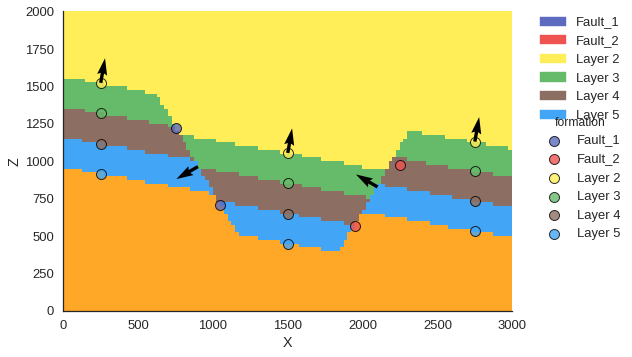

In [9]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0], 0, plot_data=True)
#plt.savefig("exp1_graben_model_w_input_data.pdf")

In [11]:
fault_block

array([[   1.        ,    1.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 950.04112828,  950.04264626,  950.04417331, ...,  949.9956692 ,
         949.99746139,  949.99917195]])

In [12]:
lith_block

array([[   0.        ,    0.        ,    0.        , ...,    3.        ,
           3.        ,    3.        ],
       [ 850.68899645,  850.69895497,  850.70891232, ...,  851.64509149,
         851.65507762,  851.66506203]])

In [13]:
interp_data.potential_at_interfaces

array([[ 949.99991836,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  900.00075477,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  851.30348467,  851.22487616,
         851.14512088,  851.06539607]])

In [14]:
fault_block

array([[   1.        ,    1.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 950.18282768,  950.18448368,  950.18605304, ...,  949.92367389,
         949.92499377,  949.92634447],
       [   2.        ,    2.        ,    2.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 900.04112828,  900.04264626,  900.04417331, ...,  899.9956692 ,
         899.99746139,  899.99917195]])

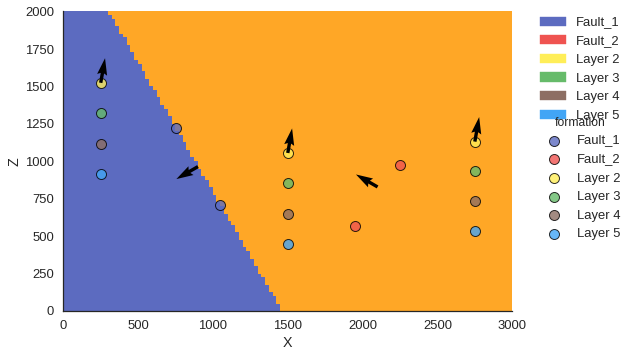

In [18]:
gp.plot_section(geo_data, fault_block[0], 0, plot_data=True)

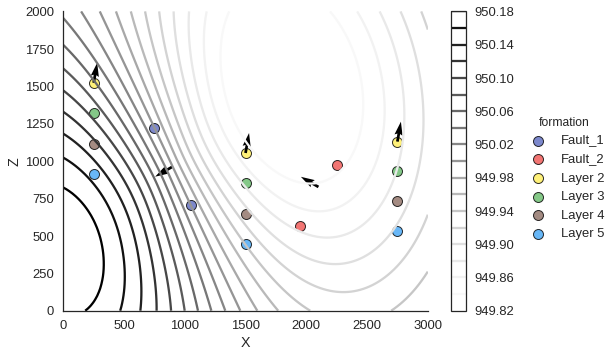

In [16]:
gp.plot_potential_field(geo_data, fault_block[1], 1, plot_data=True)
plt.colorbar()

In [17]:
interp_data.potential_at_interfaces[:2+ 1]

array([[ 949.99991836,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  900.00075477,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  851.30348467,  851.22487616,
         851.14512088,  851.06539607]])

In [18]:
fault_block[1]

array([ 950.18282768,  950.18448368,  950.18605304, ...,  949.92367389,
        949.92499377,  949.92634447])

In [10]:
ver, sim = gp.get_surfaces(interp_data, lith_block[1], [fault_block[1], fault_block[3]], original_scale=False)
gp.plot_surfaces_3D_real_time(interp_data, ver, sim, alpha=1)

fault matrix within __str__ = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
length_of_C __str__ = 5
length_of_CG __str__ = 3
length_of_CGI __str__ = 1
length_of_U_I __str__ = 0
length_of_faults __str__ = 1
cov_function __str__ = [[  3.43333333e-01   0.00000000e+00   0.00000000e+00  -5.12560495e-02
    0.00000000e+00]
 [  0.00000000e+00   3.43333333e-01   0.00000000e+00   3.12632798e-02
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.43333333e-01   4.33514210e-02
    0.00000000e+00]
 [ -5.12560495e-02   3.12632798e-02   4.33514210e-02   2.02678710e-02
    1.00000000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e-04
    0.00000000e+00]]
Faults contribution __str__ = [ 0.  0.  0. ...,  0.  0.  0.]
fault matrix within __str__ = [[   1.            1.            1.         ...,    1.            1.            1.        ]
 [ 950.18279272  950.18445012  950.18602096 ...,  950.12465114
   950.15247803  950.15247803]]
length_of_C __str__ = 5

Faults contribution __str__ = [ 0.11872977  0.11872977  0.11872977 ...,  0.11872977  0.11872977
  0.11872977]
fault matrix within __str__ = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
length_of_C __str__ = 5
length_of_CG __str__ = 3
length_of_CGI __str__ = 1
length_of_U_I __str__ = 0
length_of_faults __str__ = 1
cov_function __str__ = [[  3.43333333e-01   0.00000000e+00   0.00000000e+00  -5.12560495e-02
    0.00000000e+00]
 [  0.00000000e+00   3.43333333e-01   0.00000000e+00   3.12632798e-02
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.43333333e-01   4.33514210e-02
    0.00000000e+00]
 [ -5.12560495e-02   3.12632798e-02   4.33514210e-02   2.02678710e-02
    1.00000000e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e-04
    0.00000000e+00]]
Faults contribution __str__ = [ 0.  0.  0. ...,  0.  0.  0.]
fault matrix within __str__ = [[   1.            1.            1.         ...,    1.            1.            1.        ]
 [ 950.1

Faults contribution __str__ = [ 0.11872977  0.11872977  0.11872977 ...,  0.11872977  0.11872977
  0.11872977]


In [23]:
%debug

> /home/miguel/PycharmProjects/gempy/gempy/GemPy_f.py(594)get_surfaces()
    592                 continue
    593             else:
--> 594                 v, s = get_surface(_np.atleast_2d(potential_fault)[n-1], interp_data, pot_int, n,
    595                                    step_size=step_size, original_scale=original_scale)
    596                 vertices.append(v)

ipdb> print(n)
2
ipdb> exit


In [24]:
 interp_data.geo_data_res.interfaces['formation number'][
            interp_data.geo_data_res.interfaces['isFault']].unique()

array([1, 2])

In [15]:
np.atleast_2d([a,a])[0]

array([2])

In [15]:
group_ids = np.unique(geo_data.interfaces["group_id"])
layer_ids = group_ids[group_ids!="Fault_1"]
layer_ids = group_ids[group_ids!="Fault_2"]
layer_ids_u = [l[:-2] for l in layer_ids]
layer_ids_u = np.unique(layer_ids_u)

# PYMC Implementation

## Priors

Create pymc.Normal distributions (mean 0) as prior parameters for the layer interface positions (modifier):

In [16]:
geo_data.interfaces

,X,Y,Z,formation,series,X_std,Y_std,Z_std,group_id,order_series,isFault,formation number,annotations
0,750,0,1223,Fault_1,Fault_1,0.0,0.0,0.0,Fault_1,1,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$"
1,1050,0,704,Fault_1,Fault_1,0.0,0.0,0.0,Fault_1,1,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$"
2,2250,0,975,Fault_2,Fault_2,0.0,0.0,0.0,Fault_2,2,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},0}$"
3,1950,0,567,Fault_2,Fault_2,0.0,0.0,0.0,Fault_2,2,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},1}$"
4,250,0,1523,Layer 2,Rest,0.0,0.0,0.0,l2_a,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},0}$"
5,1500,0,1054,Layer 2,Rest,0.0,0.0,0.0,l2_b,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},1}$"
6,2750,0,1130,Layer 2,Rest,0.0,0.0,0.0,l2_c,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},2}$"
7,250,0,1320,Layer 3,Rest,0.0,0.0,0.0,l3_a,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},0}$"
8,1500,0,851,Layer 3,Rest,0.0,0.0,0.0,l3_b,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},1}$"
9,2750,0,936,Layer 3,Rest,0.0,0.0,0.0,l3_c,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},2}$"


In [17]:
interp_data.geo_data_res.foliations

,X,Y,Z,dip,azimuth,polarity,formation,G_x,G_y,G_z,series,order_series,isFault,formation number,annotations,group_id
0,0.3801,0.5001,0.4959,60,90,-1,Fault_1,-0.866025,-5.302876e-17,-0.500000,Fault_1,1,True,1,"${\bf{x}}_{\beta \,{\bf{1}},0}$",Fault_1
1,0.6201,0.5001,0.4687,60,270,1,Fault_2,-0.866025,-1.590863e-16,0.500000,Fault_2,2,True,2,"${\bf{x}}_{\beta \,{\bf{2}},0}$",Fault_2
2,0.2501,0.5001,0.6079,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},0}$",l2_a
3,0.5001,0.5001,0.5141,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},1}$",l2_b
4,0.7501,0.5001,0.5293,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},2}$",l2_c


In [18]:
interf_Z_modifier = []
interf_Z_std = 40.

for g_id in ['l2', 'l3', 'l4', 'l5']:
    interf_Z_modifier.append(pymc.Normal(g_id, 0, 1./interf_Z_std**2))
    
fault_1_dip = pymc.Normal("fault_1_dip", 60., 1./5**2)
fault_2_dip = pymc.Normal("fault_2_dip", 60., 1./5**2)
strat_dip = pymc.Normal("strat_dip", 15., 1./5**2)

For the fault we only want to change the dip angle, so we create a PlaneData object:

In [19]:
# first we remove the initial fault foliation
try:
    i = geo_data.foliations[geo_data.foliations["formation"]=="Fault_1"].index
    geo_data.foliations.drop(i, inplace=True)
    i = geo_data.foliations[geo_data.foliations["formation"]=="Fault_2"].index
    geo_data.foliations.drop(i, inplace=True)
except ValueError:
    pass
# then create it coupled with the interface points
fault_plane_1 = gp.DataManagement.DataPlane(geo_data, "Fault_1", "interf_to_fol")
fault_plane_1.set_fol()
fault_plane_2 = gp.DataManagement.DataPlane(geo_data, "Fault_2", "interf_to_fol")
fault_plane_2.set_fol()

Visualize the distribution:

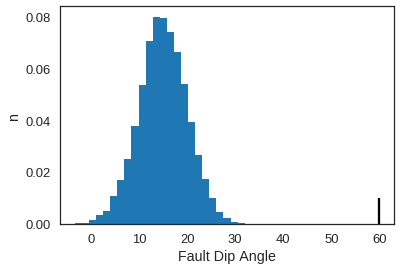

In [20]:
# sample from a distribtion
samples = [strat_dip.rand() for i in range(10000)]
# plot histogram
plt.hist(samples, bins=24, normed=True);
plt.xlabel("Fault Dip Angle")
plt.vlines(60, 0, 0.01)
#plt.xlim(40, 80)
plt.ylabel("n");

Reset series, somehow this gets messed up above - fix!

,X,Y,Z,dip,azimuth,polarity,formation,G_x,G_y,G_z,series,order_series,isFault,formation number,annotations,group_id
0,0.3801,0.5001,0.4959,60,90,-1,Fault_1,-0.866025,-5.302876e-17,-0.500000,Fault_1,1,True,1,"${\bf{x}}_{\beta \,{\bf{1}},0}$",Fault_1
1,0.6201,0.5001,0.4687,60,270,1,Fault_2,-0.866025,-1.590863e-16,0.500000,Fault_2,2,True,2,"${\bf{x}}_{\beta \,{\bf{2}},0}$",Fault_2
2,0.2501,0.5001,0.6079,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},0}$",l2_a
3,0.5001,0.5001,0.5141,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},1}$",l2_b
4,0.7501,0.5001,0.5293,10,90,1,Layer 2,0.173648,1.063288e-17,0.984808,Rest,3,False,3,"${\bf{x}}_{\beta \,{\bf{3}},2}$",l2_c


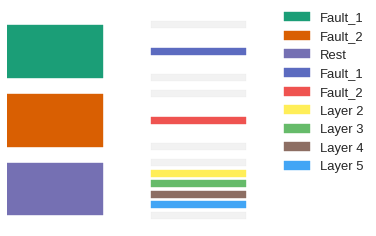

In [21]:
form = np.delete(geo_data.get_formations(), np.where(geo_data.get_formations()=="Fault_1")[0][0])
gp.set_series(geo_data, {"Fault_1":geo_data.get_formations()[np.where(geo_data.get_formations()=="Fault_1")[0][0]],
                         "Fault_2":geo_data.get_formations()[np.where(geo_data.get_formations()=="Fault_2")[0][0]],
                         "Rest":np.delete(form, np.where(form=="Fault_2"))},
                           order_series = ["Fault_1", "Fault_2", "Rest"], verbose=0, order_formations=['Fault_1', "Fault_2",'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])

geo_data.set_formation_number()
geo_data.order_table()

interp_data.geo_data_res.foliations.set_value(0, "group_id", "Fault_1")
interp_data.geo_data_res.foliations.set_value(1, "group_id", "Fault_2")
interp_data.geo_data_res.foliations.set_value(2, "group_id", "l2_a")
interp_data.geo_data_res.foliations.set_value(3, "group_id", "l2_b")
interp_data.geo_data_res.foliations.set_value(4, "group_id", "l2_c")

interp_data_original.geo_data_res.foliations.set_value(0, "group_id", "Fault_1")
interp_data_original.geo_data_res.foliations.set_value(1, "group_id", "Fault_2")
interp_data_original.geo_data_res.foliations.set_value(2, "group_id", "l2_a")
interp_data_original.geo_data_res.foliations.set_value(3, "group_id", "l2_b")
interp_data_original.geo_data_res.foliations.set_value(4, "group_id", "l2_c")

## Deterministic Functions

### Utility Functions

In [22]:
def rescale(value, rf=interp_data.rescaling_factor):
    return value / rf

def recalc_gradients(folations_dataframe):
    folations_dataframe["G_x"] = np.sin(np.deg2rad(folations_dataframe["dip"].astype('float'))) * \
                             np.sin(np.deg2rad(folations_dataframe["azimuth"].astype('float'))) * \
                             folations_dataframe["polarity"].astype('float')
    folations_dataframe["G_y"] = np.sin(np.deg2rad(folations_dataframe["dip"].astype('float'))) * \
                             np.cos(np.deg2rad(folations_dataframe["azimuth"].astype('float'))) *\
                             folations_dataframe["polarity"].astype('float')
    folations_dataframe["G_z"] = np.cos(np.deg2rad(folations_dataframe["dip"].astype('float'))) *\
                             folations_dataframe["polarity"].astype('float')

Create Plane object for fault plane:

In [23]:
from gempy import UncertaintyAnalysisPYMC2
importlib.reload(UncertaintyAnalysisPYMC2)
fault_plane1 = UncertaintyAnalysisPYMC2.Plane("Fault_1", interp_data.geo_data_res)
fault_plane2 = UncertaintyAnalysisPYMC2.Plane("Fault_2", interp_data.geo_data_res)

### Input data handling

In [24]:
layer_ids_u = np.delete(layer_ids_u, np.where(layer_ids_u=="Fault"))

In [41]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,X_std,Y_std,Z_std,group_id,order_series,isFault,formation number,annotations
0,0.3501,0.5001,0.558347,Fault_1,Fault_1,0.0,0.0,0.0,Fault_1,1,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$"
1,0.4101,0.5001,0.433453,Fault_1,Fault_1,0.0,0.0,0.0,Fault_1,1,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$"
2,0.6501,0.5001,0.516531,Fault_2,Fault_2,0.0,0.0,0.0,Fault_2,2,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},0}$"
3,0.5901,0.5001,0.420869,Fault_2,Fault_2,0.0,0.0,0.0,Fault_2,2,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},1}$"
4,0.2501,0.5001,0.595965,Layer 2,Rest,0.0,0.0,0.0,l2_a,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},0}$"
5,0.5001,0.5001,0.502165,Layer 2,Rest,0.0,0.0,0.0,l2_b,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},1}$"
6,0.7501,0.5001,0.517365,Layer 2,Rest,0.0,0.0,0.0,l2_c,3,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},2}$"
7,0.2501,0.5001,0.561564,Layer 3,Rest,0.0,0.0,0.0,l3_a,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},0}$"
8,0.5001,0.5001,0.467764,Layer 3,Rest,0.0,0.0,0.0,l3_b,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},1}$"
9,0.7501,0.5001,0.484764,Layer 3,Rest,0.0,0.0,0.0,l3_c,3,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},2}$"


In [42]:
layer_ids_u

array(['l2', 'l3', 'l4', 'l5'],
      dtype='<U5')

In [46]:
@pymc.deterministic(trace=True)
def input_data(value = 0,
               interf_Z_modifier = interf_Z_modifier,
               strat_dip = strat_dip,
               fault_1_dip = fault_1_dip,
               fault_2_dip = fault_2_dip,
               fault_plane1 = fault_plane1,
               fault_plane2 = fault_plane2,
               group_ids = group_ids,
               layer_ids = layer_ids,
               layer_ids_u = layer_ids_u,
               interp_data = interp_data,
               interp_data_original = interp_data_original,
               verbose=True):

    # reset data in geo_data_res to geo_data 
    # (this now includes the updated fault plane data)
    interp_data.geo_data_res = copy.deepcopy(interp_data_original.geo_data_res)
    #interp_data_stoch = gp.get_data(interp_data.geo_data_res, numeric=True)
    if verbose is True:
        #print(interp_data_stoch)
        print(interp_data.geo_data_res.interfaces[["X", "Y", "Z"]].astype(float))
        print(interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", "azimuth", "dip", "polarity"]].astype(float))
    
    fault_plane1 = UncertaintyAnalysisPYMC2.Plane("Fault_1", interp_data.geo_data_res)
    fault_plane2 = UncertaintyAnalysisPYMC2.Plane("Fault_2", interp_data.geo_data_res)
    # fault plane
    if verbose == "dip":
        print(interp_data.geo_data_res.foliations["dip"])
    
    fault_plane1.interf_recalc_Z(fault_1_dip)
    fault_plane2.interf_recalc_Z(fault_2_dip)
    
    if verbose == "dip":
        print(interp_data.geo_data_res.foliations["dip"])
    
    # interf dip
    for affix in ["_a", "_b", "_c"]:
        f = interp_data.geo_data_res.foliations["group_id"] == "l2" + affix
        index = interp_data.geo_data_res.foliations[f].index
        interp_data.geo_data_res.foliations.set_value(index, "dip", int(strat_dip))
    recalc_gradients(interp_data.geo_data_res.foliations)
    
    # interf vertical mod
    for i, layer_id in enumerate(layer_ids_u):
        for affix in ["_a", "_b", "_c"]:
            # interface positions
            f = interp_data.geo_data_res.interfaces["group_id"] == layer_id + affix
            index = interp_data.geo_data_res.interfaces[f].index
            # get the z value of the interface
            vals = interp_data.geo_data_res.interfaces.iloc[index]["Z"].astype(float).values
            if verbose is True:
                print("vals of ",layer_id,affix,vals)
                
            # modify it with the according rescaled prior
            vals += rescale(interf_Z_modifier[i])
            if verbose is True:
                print("vals mod:",rescale(interf_Z_modifier[i]))
            # replace value
            interp_data.geo_data_res.interfaces.set_value(index, "Z", vals)
            if verbose is True:
                print("modded val:",interp_data.geo_data_res.interfaces.iloc[index]["Z"])
            
            # foliation positions
            f = interp_data.geo_data_res.foliations["group_id"] == layer_id + affix
            index = interp_data.geo_data_res.foliations[f].index
            # get the z value of the interface
            vals = interp_data.geo_data_res.foliations.iloc[index]["Z"].astype(float).values
            # modify it with the according rescaled prior
            vals += rescale(interf_Z_modifier[i])
            # replace value
            interp_data.geo_data_res.foliations.set_value(index, "Z", vals) 
            
    interp_data.update_interpolator()
    
    if verbose is True:
        print(interp_data.geo_data_res.interfaces[["X", "Y", "Z"]].astype(float))
        print(interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", "azimuth", "dip", "polarity"]].astype("float64"))
    
    return [interp_data.geo_data_res.interfaces[["X", "Y", "Z"]].astype(float), 
            interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", "azimuth", "dip", "polarity"]].astype("float64")]

         X       Y       Z
0   0.3501  0.5001  0.5479
1   0.4101  0.5001  0.4441
2   0.6501  0.5001  0.4983
3   0.5901  0.5001  0.4167
4   0.2501  0.5001  0.6079
5   0.5001  0.5001  0.5141
6   0.7501  0.5001  0.5293
7   0.2501  0.5001  0.5673
8   0.5001  0.5001  0.4735
9   0.7501  0.5001  0.4905
10  0.2501  0.5001  0.5267
11  0.5001  0.5001  0.4329
12  0.7501  0.5001  0.4499
13  0.2501  0.5001  0.4861
14  0.5001  0.5001  0.3923
15  0.7501  0.5001  0.4093
        G_x           G_y       G_z       X       Y       Z  azimuth   dip  \
0 -0.866025 -5.302876e-17 -0.500000  0.3801  0.5001  0.4959     90.0  60.0   
1 -0.866025 -1.590863e-16  0.500000  0.6201  0.5001  0.4687    270.0  60.0   
2  0.173648  1.063288e-17  0.984808  0.2501  0.5001  0.6079     90.0  10.0   
3  0.173648  1.063288e-17  0.984808  0.5001  0.5001  0.5141     90.0  10.0   
4  0.173648  1.063288e-17  0.984808  0.7501  0.5001  0.5293     90.0  10.0   

   polarity  
0      -1.0  
1       1.0  
2       1.0  
3       1.0  
4 

### GemPy modeling function

In [26]:
gp.get_kriging_parameters(interp_data)

range 0.7212662476506163 3606.33123825
Number of drift equations [0 0 3]
Covariance at 0 0.012386309523809529
Foliations nugget effect 0.01


In [27]:
%matplotlib inline
# interp_data.update_interpolator(geo_data_res=interp_data.geo_data_res, range_var=0.9)
@pymc.deterministic(trace=False)  # turn on/off storing the model blocks in db
def gempy_model(value=0,
                input_data=input_data,
                verbose=False):
    
    # modify input data values accordingly
    # interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]
    # interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", "azimuth", "dip", "polarity"]] = input_data[1]
    
    try:
        # try to compute model
        lb, fb = gp.compute_model(interp_data)
        if verbose:
            gp.plot_section(interp_data.geo_data_res, lb[0], 0, plot_data=False)
            
        return lb, fb
    
    except numpy.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to 
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
            
        return np.zeros_like(lith_block), np.zeros_like(fault_block)

### Topology function

In [29]:
@pymc.deterministic
def gempy_topo(value=0, gm=gempy_model, verbose=False):
    
    G, c, lu, lot1, lot2 = gp.topology_compute(geo_data, gm[0][0], gm[1][0], 
                                               cell_number=0, direction="y")
    
    if verbose:
        gp.plot_section(geo_data, gm[0][0], 0)
        gp.topology_plot(geo_data, G, c)
    return G, c, lu, lot1, lot2

# Likelihood Functions

In [30]:
sys.path.append("../")
from pynoddy.experiment import pymc2_posterior

importlib.reload(pymc2_posterior)
importlib.reload(pynoddy.history)
pp = pymc2_posterior.Pymc2Posterior("pyn_graben_run4.hdf5")
# pp.topo_analyze()

Unable to load pynoddy block models. Either none were tallied or the respective pymc2 deterministic function is not named 'pynoddy_model'. If so change 'pymc_model_f' parameter accordingly.


In [31]:
pp.set_history("init4.his")
pp.set_experiment()

History file set to self.history


In [32]:
pp.topo_analyze()

Starting topology analysis. This could take a while (depending on # iterations).
Topology analysis completed.


In [33]:
pp.topo_count_connection(4,7)/pp.db.getstate()["sampler"]["_iter"] * 100

20.09

## Single Adjacency Area Likelihood

In [23]:
def get_areas_for_edge_for_topo_id(pp_obj, topo_id, n1, n2):
    """Get all area values for edge n1--n2 from a certain topo_id."""
    areas = np.array([])
    for i in np.where(pp.topo_unique_ids == topo_id)[0]:
        try:
            a = pp_obj.topo_graphs[i].adj[n1][n2]["area"]
            areas = np.append(areas, a)
        except KeyError:
            # edge does not exist -> set 0 as adjacency area
            a = 0.
            areas = np.append(areas, a)
            # continue
    return areas

def get_all_possible_edges(topos):
    """Get all occuring edges throughout all graphs in list/array."""
    storage = []
    for graph in topos:
        for edge in graph.edges():
            if edge in storage:
                continue
            else:
                storage.append(edge)
    return storage

def combined_areas_for_all_topo_ids(edge_areas, edge):
    storage = np.array([])
    for i in range(len(edge_areas)):
        storage = np.append(storage, edge_areas[i][edge])
    return storage

In [24]:
def get_area_for_edge(G, e):
    """Get adjacency area of edge e (a, b) in graph G. 
    Returns 0 if no edge/area exists."""
    try:
        return G.adj[e[0]][e[1]]["area"]
    except KeyError:
        return 0

def get_area_for_edge_all(graphs, e):
    """e = (a, b) edge"""
    areas = np.array([])
    for G in graphs:
        areas = np.append(areas, get_area_for_edge(G, e))
    return areas

In [25]:
edges = [(4,7), (4,8), (4,9),
         (3,7), (3,8), (3,9),
         (2,7), (2,8), (2,9),
         (7,14), (7,13), (7,12),
         (8,14), (8,13), (8,12),
         (9,14), (9,13), (9,12)]

In [26]:
from sklearn.neighbors import KernelDensity

In [27]:
kde_list = []
for e in edges:
    a = get_area_for_edge_all(pp.topo_graphs, e)
    kde_list.append(KernelDensity(kernel="gaussian").fit(a.reshape(-1, 1)))

### fix pymc

In [ ]:
def stochastic_from_data(name, data, lower=-np.inf, upper=np.inf,
                         value=None, observed=False, trace=True, verbose=-1, debug=False):
    """
    Return a Stochastic subclass made from arbitrary data.

    The histogram for the data is fitted with Kernel Density Estimation.

    :Parameters:
      - `data`  : An array with samples (e.g. trace[:])
      - `lower` : Lower bound on possible outcomes
      - `upper` : Upper bound on possible outcomes

    :Example:
       >>> from pymc import stochastic_from_data
       >>> pos = stochastic_from_data('posterior', posterior_samples)
       >>> prior = pos # update the prior with arbitrary distributions

    :Alias:
      Histogram
    """
    pdf = scipy.stats.kde.gaussian_kde(data)  # automatic bandwidth selection

    # account for tail contribution
    lower_tail = upper_tail = 0.
    if lower > -np.inf:
        lower_tail = pdf.integrate_box(-np.inf, lower)
    if upper < np.inf:
        upper_tail = pdf.integrate_box(upper, np.inf)
    factor = 1. / (1. - (lower_tail + upper_tail))

    def logp(value):
        prob = factor * pdf(value)
        if value < lower or value > upper:
            return -np.inf
        elif prob <= 0.:
            return -np.inf
        else:
            return np.log(prob)

    def random():
        res = pdf.resample(1)[0][0]
        while res < lower or res > upper:
            res = pdf.resample(1)[0][0]
        return res

    if value is None:
        value = random()

    return pymc.Stochastic(logp=logp,
                      doc='Non-parametric density with Gaussian Kernels.',
                      name=name,
                      parents={},
                      random=random,
                      trace=trace,
                      value=value,
                      dtype=float,
                      observed=observed,
                      verbose=verbose)


# Alias following Stochastics naming convention
Histogram = stochastic_from_data

create likelihood functions:

In [28]:
like_list = []
for e in edges:
    a = get_area_for_edge_all(pp.topo_graphs, e)
    #like_list.append(stochastic_from_data("like_"+str(e[0])+"_"+str(e[1]), a, lower=0, value=get_area_for_edge(gempy_topo_extract.value, e)))
    like_list.append(pymc.Normal("like_"+str(e[0])+"_"+str(e[1]), mu=get_area_for_edge(gempy_topo_extract.value, e), tau=1./np.std(a)**2, observed=True, value=a))

In [29]:
like_list

[<pymc.distributions.new_dist_class.<locals>.new_class 'like_4_7' at 0x7fa0958702b0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_4_8' at 0x7fa095870e10>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_4_9' at 0x7fa0959374e0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_3_7' at 0x7fa095937278>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_3_8' at 0x7fa095937390>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_3_9' at 0x7fa0959375c0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_2_7' at 0x7fa095937240>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_2_8' at 0x7fa095937dd8>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_2_9' at 0x7fa086f41c18>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_7_14' at 0x7fa086f41be0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'like_7_13' at 0x7fa086f41cf8>,
 <pymc.distributions.new_dist_class.<locals>.new_cla

In [39]:
len(edges)

18

In [28]:
@pymc.stochastic
def like_area_edge_0(value=0, i=0, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_1(value=0, i=1, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_2(value=0, i=2, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_3(value=0, i=3, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_4(value=0, i=4, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_5(value=0, i=5, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_6(value=0, i=6, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_7(value=0, i=7, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_8(value=0, i=8, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_9(value=0, i=9, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_10(value=0, i=10, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_11(value=0, i=11, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_12(value=0, i=12, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_13(value=0, i=13, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_14(value=0, i=14, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_15(value=0, i=15, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_16(value=0, i=16, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

@pymc.stochastic
def like_area_edge_17(value=0, i=17, kde_list=kde_list, edges=edges, gempy_topo=gempy_topo):
    return kde_list[i].score(get_area_for_edge(gempy_topo[0], edges[i]))

In [29]:
like_list = [like_area_edge_0, 
             like_area_edge_1,
             like_area_edge_2,
             like_area_edge_3,
             like_area_edge_4,
            like_area_edge_5,
            like_area_edge_6,
            like_area_edge_7,
            like_area_edge_8,
            like_area_edge_9,
            like_area_edge_10,
            like_area_edge_11,
             like_area_edge_12,
             like_area_edge_13,
             like_area_edge_14,
            like_area_edge_15,
            like_area_edge_16,
            like_area_edge_17]

### KDE

In [110]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

In [125]:
kde = KernelDensity(kernel="gaussian").fit(areas.reshape(-1, 1))
#kde2 = KernelDensity(kernel="tophat").fit(areas.reshape(-1, 1))

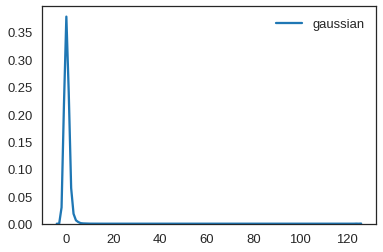

In [126]:
#samples2 = kde2.sample(n_samples=50000)
#sns.distplot(samples2, label="tophat", hist=False)


In [42]:
kde.score(0)

-1.047478816587871

In [50]:
kde.score(10)

-5.0586295146823463

In [61]:
@pymc.stochastic
def like_single_adj_area(value=0, n1=n1, n2=n2, kde=kde, G=gempy_topo[0]):
    try:
        area = G.adj[n1][n2]["area"]
        return kde.score(area)
    except KeyError:
        # if not connected
        return kde.score(0)

8

## Plot

## Graph Comparison: Direct Jaccard Coefficient Comparison with most-likely kinematic topology graph

In [34]:
def compare_graphs(G1, G2):
    intersection = 0
    union = G1.number_of_edges()

    for edge in G1.edges_iter():
        if G2.has_edge(edge[0], edge[1]):
            intersection += 1
        else:
            union += 1

    return intersection / union

In [ ]:
G = copy.copy(pp.topo_graphs[0])

### Probabilistic Graph Comparison ?

In [41]:
pp.topo_unique_freq = np.array(pp.topo_unique_freq)
pp.topo_unique = np.array(pp.topo_unique)
booly = pp.topo_unique_freq<10

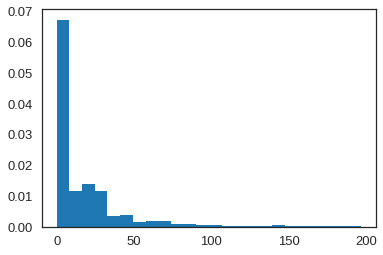

In [43]:
plt.hist(pp.topo_unique_ids, normed=True, bins=24);

In [25]:
@pymc.stochastic
def like_topo_all(value=0,
                  gt = gempy_topo,
                  topo_unique=pp.topo_unique,#[booly],
                  topo_unique_prob=pp.topo_unique_prob,#[booly], 
                  verbose=False):
    
    # check gp_topo against unique topos
    try:
        for i, tu in enumerate(topo_unique):
            j = compare_graphs(gt[0], tu)
            if verbose:
                print(i, "j:", j)
            if j == 1.:  # this is a match
                if verbose:
                    print(np.log(topo_unique_prob[i]))
                return np.log(topo_unique_prob[i])

        if verbose:
            print("no match:", np.log(1e-99))
        return np.log(1e-99)
    except ZeroDivisionError:
        return np.log(1e-99)

In [35]:
@pymc.stochastic
def like_topo_single(value=0,
                     gt = gempy_topo,
                     topo_like_graph = pp.topo_unique[0],
                     verbose=False):
    # checks model against single graph likelihood
    try:
        j = compare_graphs(gt[0], topo_like_graph)
        if j == 1.:
            return np.log(0.95)
        else:
            return np.log(0.05)
    except ZeroDivisionError:
        return np.log(1e-99)

In [52]:
@pymc.stochastic
def like_topo_single_edge(value=0,
                          gt = gempy_topo,
                          verbose=False):
    return pymc.bernoulli_like(7 in gt[0].adj[4].keys(), 0.95)        

### Centroid Position Likelihood

## pymc Model Set-Up

In [36]:
params = [input_data, gempy_model, *interf_Z_modifier, fault_1_dip, fault_2_dip, strat_dip, gempy_topo, like_topo_single]#,*like_list, like_single_adj_area]#like_topo_single]#, like_topo_all] # like_jaccard_cauchy]
model = pymc.Model(params)

In [37]:
iterations = 2100

In [38]:
RUN = pymc.MCMC(model, db="hdf5", dbname="simulations/exp1_graben_BI_jaccard_topo_single")  # exp1_id_2_BI_9_combined_topo

In [39]:
RUN.sample(iter=iterations, burn=100, tune_interval=20)

 [-----------------100%-----------------] 2101 of 2100 complete in 12593.0 sec

## Check

Plotting fault_2_dip
Plotting l3
Plotting l4
Plotting l5
Plotting strat_dip
Plotting like_topo_single
Plotting fault_1_dip
Plotting l2


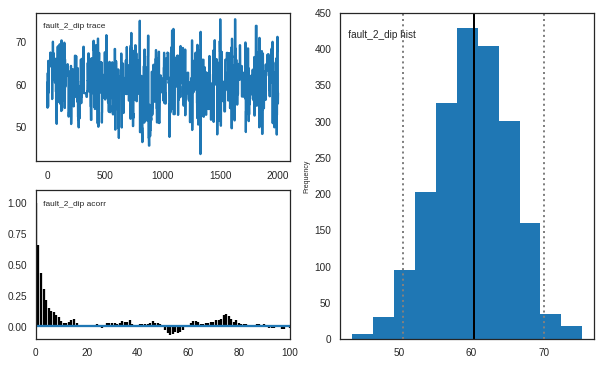

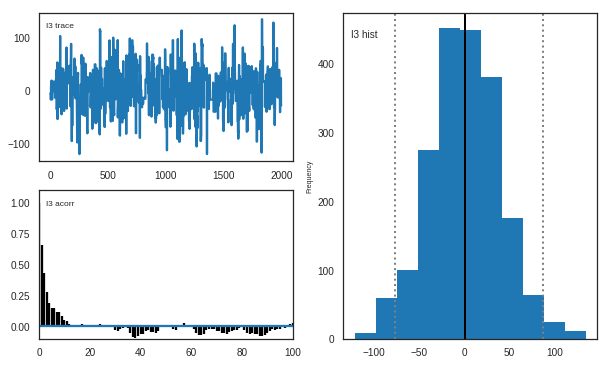

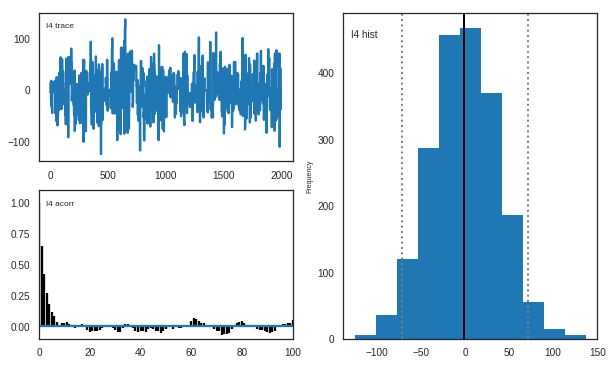

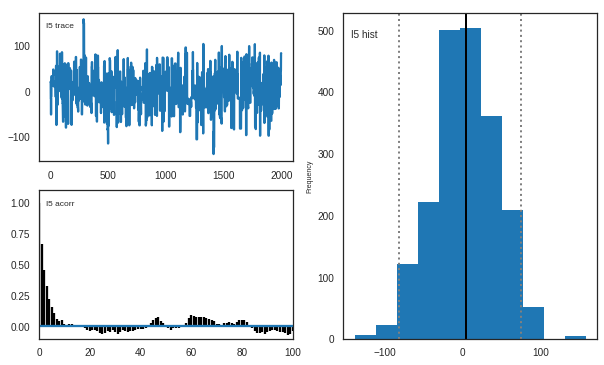

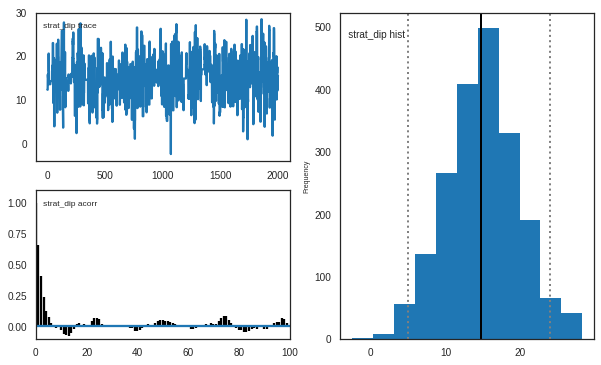

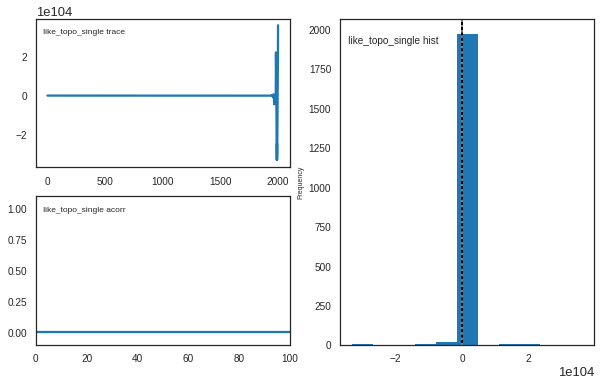

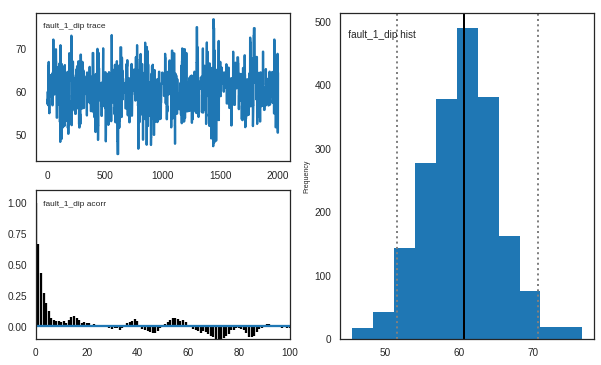

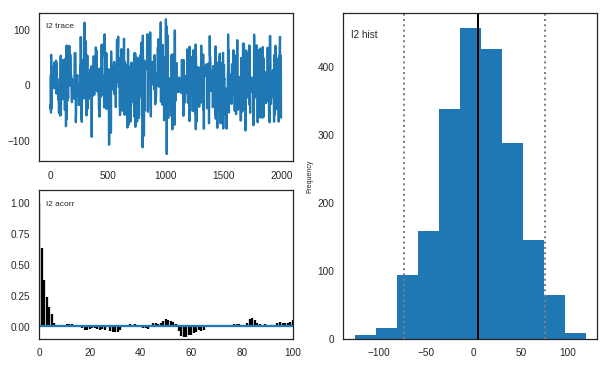

In [40]:
pymc.Matplot.plot(RUN)

In [68]:
from scipy import stats

In [69]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.log())

In [74]:
np.polyfit(x, np.log(RUN.trace("like_topo_all")[:]),1)

array([ nan,  nan])

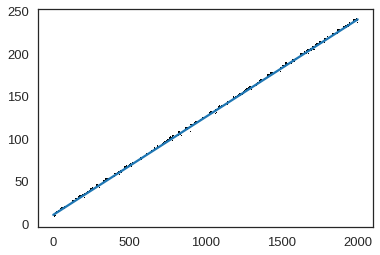

In [85]:
%matplotlib inline
a = [i/8.7+10 for i in range(2000)]
plt.plot(np.log(RUN.trace("like_topo_all")[:]), "k,")
plt.plot(x,a)